# Implementacion del agente con aprendizaje Q Learning.


In [ ]:
import numpy as np
rng = np.random.default_rng()

class QLearningAgent:
    """
    Q-learning agent.
    """

    def __init__(self, env, gamma, epsilon, decay_epsilon, alpha):
        """
        :param env: gym-like environment
        :param gamma: discount factor
        :param epsilon: exploration parameter
        :param decay_epsilon: exploration decay parameter
        :param alpha: learning rate
        """
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay_epsilon = decay_epsilon
        self.alpha = alpha

        # Q_table
        self.Q = {}

    def act(self, state):
        "Returns an action using epsilon-greedy action selection."
        state_key = hash(str(state))

        q_values = self.Q.get(state_key, np.zeros(self.env.action_space.n))
        action = np.argmax(q_values)

        if rng.random() < self.epsilon:
            action = self.env.action_space.sample()

        action_to_names = {
            0: 'RIGHT',
            1: 'DOWN',
            2: 'LEFT',
            3: 'UP',
            4: 'BOMB',
            5: 'WAIT',
        }

        #print("Action: ", action_to_names[action])
        return action

    def update(self, state, action, reward, next_state):
        """
        Update Q-values using the Q-learning update rule with Bellman target.
        Q(s, a) = Q(s, a) + alpha * [reward + gamma * max(Q(s', a')) - Q(s, a)]
        """
        state_key = hash(str(state))
        next_state_key = hash(str(next_state))

        q_values = self.Q.get(state_key, np.zeros(self.env.action_space.n))
        next_q_values = self.Q.get(next_state_key, np.zeros(self.env.action_space.n))

        max_next_q = np.max(next_q_values)

        bellman_target = reward + self.gamma * max_next_q

        q_values[action] = q_values[action] + self.alpha * (bellman_target - q_values[action])

        self.Q[state_key] = q_values


    def train(self, nb_episodes):
        "Runs the agent on the environment for nb_episodes. Returns the list of obtained returns."

        # Returns
        returns = []
        steps = []

        # Fixed number of episodes
        for episode in range(nb_episodes):

            # Reset
            state, info = self.env.reset()
            done = False
            nb_steps = 0

            # Store rewards
            return_episode = 0.0

            # Sample the episode
            while not done:

                # Select an action
                action = self.act(state)

                # Perform the action
                next_state, reward, terminal, truncated, info = self.env.step(action)

                # Learn from the transition
                self.update(state, action, reward, next_state)

                # Go in the next state
                state = next_state

                # Increment time
                nb_steps += 1
                return_episode += reward

                # End of the episode
                done = terminal or truncated

            # Store info
            returns.append(return_episode)
            steps.append(nb_steps)


        return returns, steps
    
    def test(self, recorder=None):
        "Performs a test episode without exploration."
        previous_epsilon = self.epsilon
        self.epsilon = 0.0  # Desactivar la exploración durante la prueba

        # Reset
        state = self.env.reset()
        done = False
        nb_steps = 0
        return_episode = 0

        # Sample the episode
        while not done:
            action = self.act(state)  # Utilizar la estrategia epsilon-greedy sin exploración
            next_state, reward, terminal, truncated, info = self.env.step(action)
            return_episode += reward
            state = next_state
            nb_steps += 1
            done = terminal or truncated

        self.epsilon = previous_epsilon  # Restaurar el valor original de epsilon

        if recorder is not None:
            recorder.record(self.env.render())

        return return_episode, nb_steps

# Resultados obtenidos con Q Learning
Al igual que con Monte Carlo, en Q learning los estados de recompensa se mantendran puesto que se estará utilizando el mismo entorno y además el total de episodios se mantendrá en 20000.

## Dimensiones de la grila: 5x5
- Cantidad de cajas rompibles: 1
- Cantidad de enemigos: 1 vertical

### Valores utilizados
Agente Conservador
- Gamma 0,9
- Epsilon: 1,5
- Alfa: 0,001
- decay_epsilon = 0.99

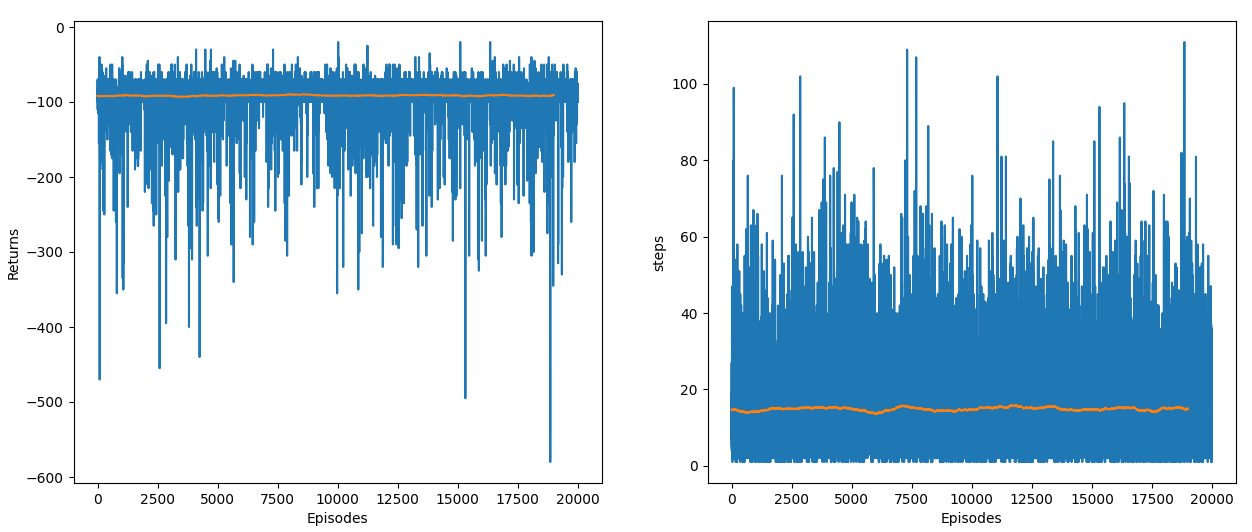






## Dimensiones de la grila: 5x5
- Cantidad de cajas rompibles: 1
- Cantidad de enemigos: 1 vertical

### Valores utilizados
Agente explorador
- Gamma 0,8
- Epsilon: 4,5
- Alfa: 0,1
- decay_epsilon = 1e-5

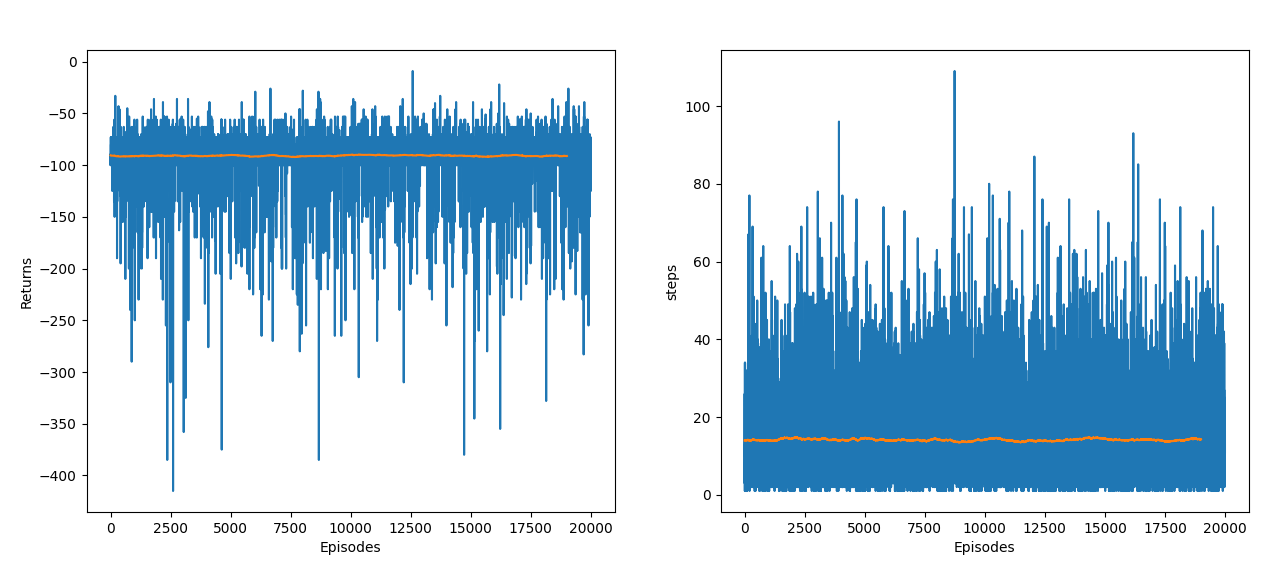

## Dimensiones de la grila: 8x8
- Cantidad de cajas rompibles: 6
- Cantidad de enemigos: 5 vertical
- Cantidad de enemigos: 5 horizontal

### Valores utilizados
Agente conservador
- Gamma 0,9
- Epsilon: 1,5
- Alfa: 0,001
- decay_epsilon = 0.99

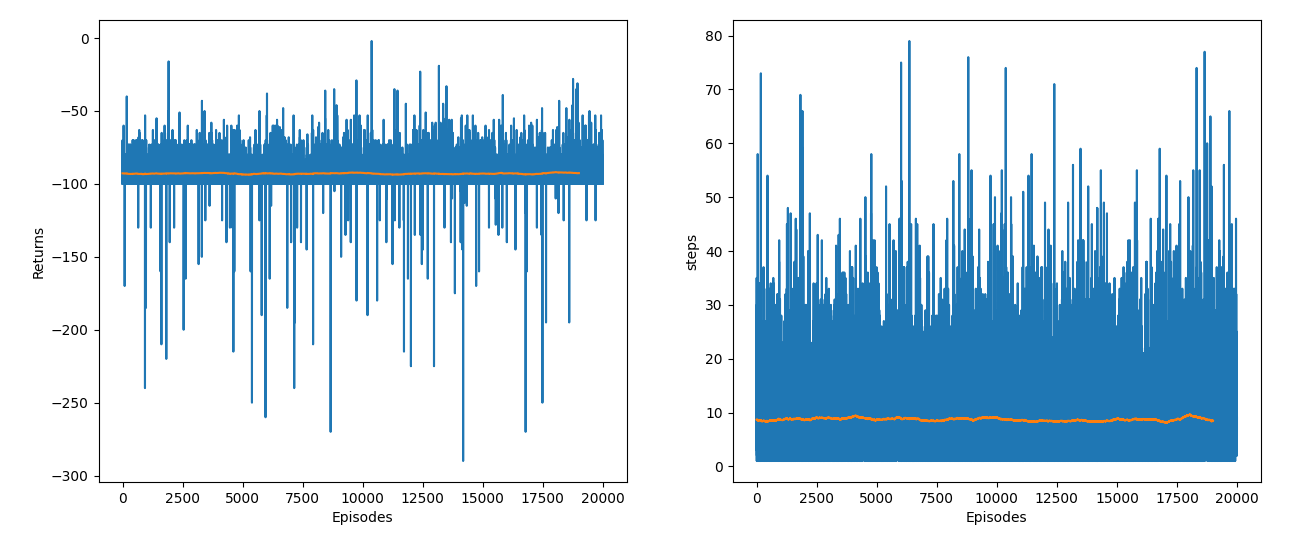

## Dimensiones de la grila: 8x8
- Cantidad de cajas rompibles: 6
- Cantidad de enemigos: 5 vertical
- Cantidad de enemigos: 5 horizontal

### Valores utilizados
Agente explorador
- Gamma 0,5
- Epsilon: 4,5
- Alfa: 0,1
- decay_epsilon = 0.99

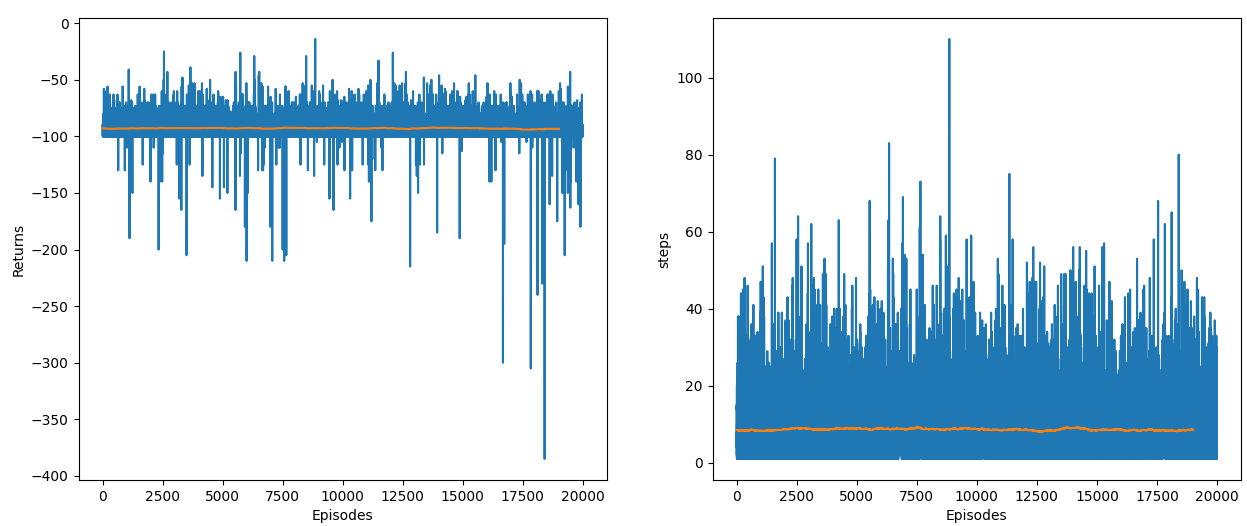

## Dimensiones de la grila: 8x8
- Cantidad de cajas rompibles: 16
- Cantidad de enemigos: 5 vertical
- Cantidad de enemigos: 5 horizontal

### Valores utilizados
Agente conservador
- Gamma 0,9
- Epsilon: 1,5
- Alfa: 0,001
- decay_epsilon = 0.99

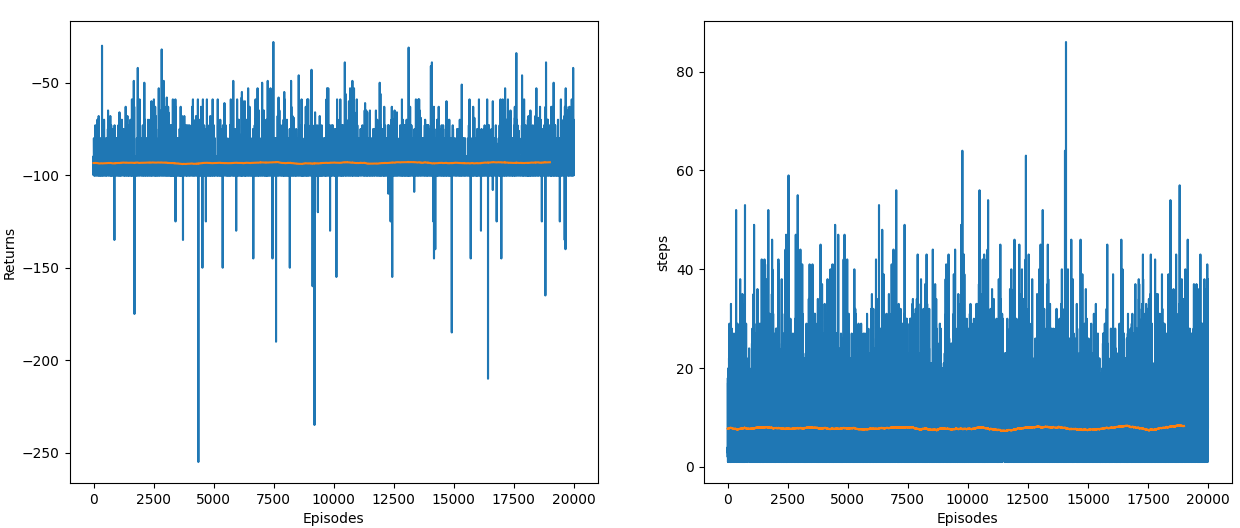



## Dimensiones de la grila: 8x8
- Cantidad de cajas rompibles: 16
- Cantidad de enemigos: 5 vertical
- Cantidad de enemigos: 5 horizontal

### Valores utilizados
Agente explorador
- Gamma 0,5
- Epsilon: 4,5
- Alfa: 0,1
- decay_epsilon = 0.99

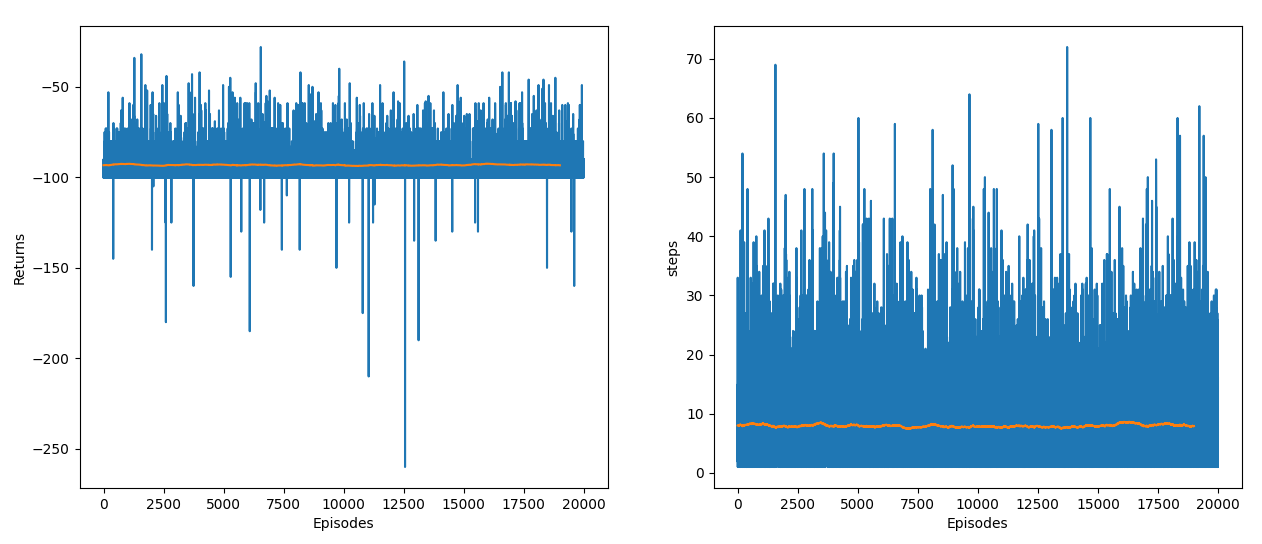

## Dimensiones de la grila: 8x8
- Cantidad de cajas rompibles: 16
- Cantidad de enemigos: 7 vertical
- Cantidad de enemigos: 7 horizontal

### Valores utilizados
Agente conservador
- Gamma 0,9
- Epsilon: 1,5
- Alfa: 0,001
- decay_epsilon = 0.99

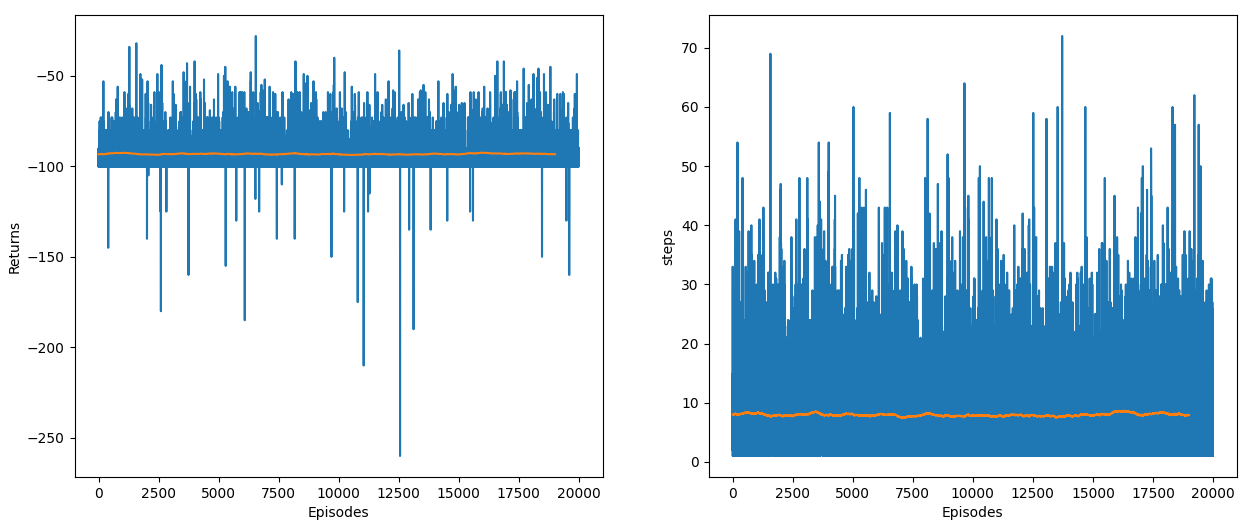

## Dimensiones de la grila: 8x8
- Cantidad de cajas rompibles: 16
- Cantidad de enemigos: 7 vertical
- Cantidad de enemigos: 7 horizontal

### Valores utilizados
Agente explorador
- Gamma 0,5
- Epsilon: 4,5
- Alfa: 0,1
- decay_epsilon = 0.99

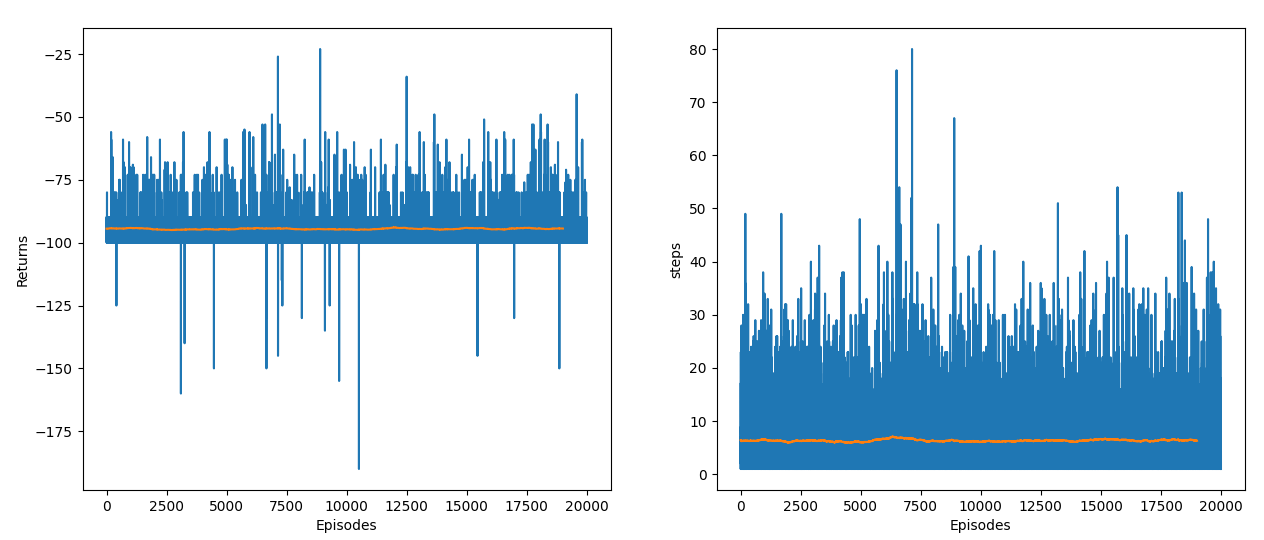